In [1]:
import torch
import matplotlib.pyplot as plt
from bindsnet.network import Network
from bindsnet.network.nodes import Input, LIFNodes
from bindsnet.network.topology import Connection
from bindsnet.network.monitors import Monitor
from bindsnet.analysis.plotting import plot_spikes, plot_voltages




In [13]:
time = 500 #in ms
network = Network()
source_layer = Input(n=100)
target_layer = LIFNodes(n=1000)

network.add_layer(
    layer=source_layer,
    name="A"
)

network.add_layer(
    layer=target_layer,
    name="B"
)

forward_connection = Connection(
    source=source_layer,
    target=target_layer,
    w= 0.05 + 0.1 * torch.randn(source_layer.n, target_layer.n)
)

network.add_connection(
    connection=forward_connection,
    source="A",
    target="B"
)

#a recurrent connection
recurrent_connection = Connection(
    source=target_layer,
    target=target_layer,
    w= 0.025 * (torch.eye(target_layer.n) - 1), # Small, inhibitory "competitive" weights.
)

network.add_connection(
    connection=recurrent_connection, source="B", target="B"
)

In [14]:
source_monitor = Monitor(
    obj=source_layer,
    state_vars=("s"),
    time=time,
)

target_monitor = Monitor(
    obj=target_layer,
    state_vars=("s", "v"),
    time=time,
)

network.add_monitor(monitor=source_monitor, name="A")
network.add_monitor(monitor=target_monitor, name="B")

In [15]:
input_data = torch.bernoulli(0.1 * torch.ones(time, source_layer.n)).byte()
input_data.shape #here 500 is the time step and 100 is the no of input neurons

torch.Size([500, 100])

In [16]:
inputs = {"A": input_data}
network.run(inputs=inputs, time=time)


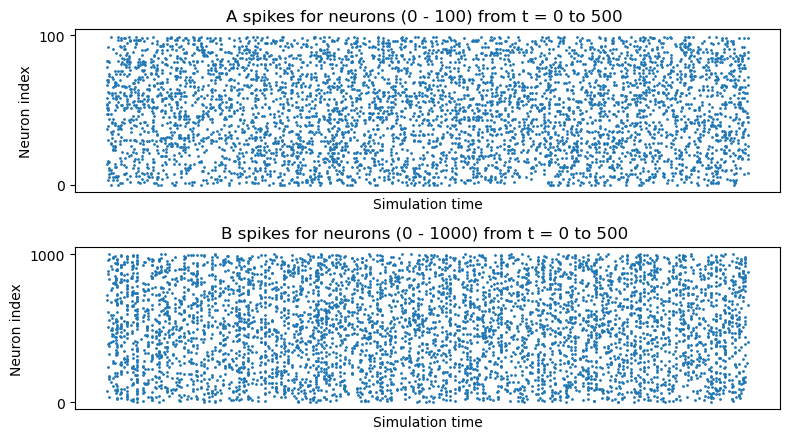

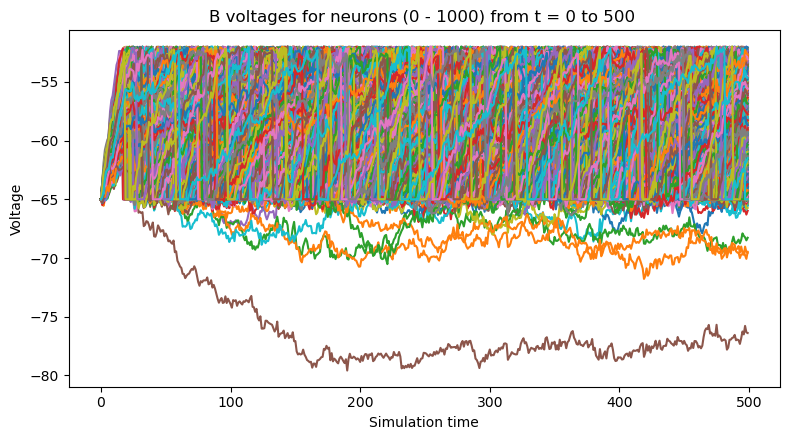

In [17]:
spikes = {
    "A": source_monitor.get("s"), "B": target_monitor.get("s")
}
voltages = {"B": target_monitor.get("v")}

plt.ioff()
plot_spikes(spikes)
plot_voltages(voltages, plot_type="line")
plt.show()